In [ ]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
    zip_ref.extractall("devanagari")

# List extracted folders
print(os.listdir("devanagari"))


['Hindi', 'digits', 'Top-10']


In [ ]:
import os

# Check top-level folder after extraction
print("Top-level folders:", os.listdir("devanagari"))

# Try drilling deeper if needed
for folder in os.listdir("devanagari"):
    print(f"\nContents of '{folder}':")
    print(os.listdir(os.path.join("devanagari", folder)))


Top-level folders: ['Hindi', 'digits', 'Top-10']

Contents of 'Hindi':
['Train', 'Test']

Contents of 'digits':
['digits']

Contents of 'Top-10':
['Train', 'Test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "devanagari/Hindi/Train"
test_dir = "devanagari/Hindi/Test"

img_size = (32, 32)  # Based on the dataset image size

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,790 (1.22 MB)

 Trainable params: 319,790 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2443/2444 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5475 - loss: 1.6406

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2444/2444 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.5476 - loss: 1.6401 - val_accuracy: 0.9438 - val_loss: 0.1950
Epoch 2/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 110s 45ms/step - accuracy: 0.8715 - loss: 0.4146 - val_accuracy: 0.9619 - val_loss: 0.1276
Epoch 3/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 138s 43ms/step - accuracy: 0.9134 - loss: 0.2786 - val_accuracy: 0.9702 - val_loss: 0.0974
Epoch 4/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 103s 42ms/step - accuracy: 0.9310 - loss: 0.2130 - val_accuracy: 0.9753 - val_loss: 0.0807
Epoch 5/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 109s 45ms/step - accuracy: 0.9441 - loss: 0.1742 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 6/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 104s 43ms/step - accuracy: 0.9509 - loss: 0.1563 - val_accuracy: 0.9784 - val_loss: 0.0732
Epoch 7/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 103s 42ms/step - accuracy: 0.9568 - loss: 0.1331 - val_accuracy: 0.9802 - val_loss: 0.0658
Epoch 8/10
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 104s 43ms/step - accuracy: 0.9616 - lo

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test accuracy: {accuracy:.4f}")


432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9756 - loss: 0.0820
Test accuracy: 0.9806


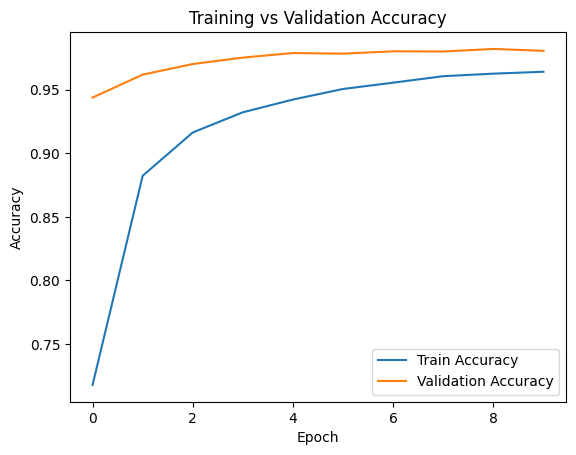

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
